<a href="https://colab.research.google.com/github/good0neighbour/ESTCampAI/blob/main/TextMining/ex01_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A7%88%EC%9D%B4%EB%8B%9D_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MarkDown : Ctrl + M M
# 셀 삭제 : Ctrl + M D
# 셀 추가 : b

In [ ]:
# Colab 장점
# 1. 런타임 유형 변경 -> GPU 이용할 수 있다.
# 2. Google Drive랑 연동되어 코드를 언제 어디서든 확인 가능
# 3. 인기 라이브러리들이 미리 설치되어 있다.
# Colab 단점
# 1. 런타임 최대 24시간까지 밖에 유지되지 않는다.

## Text Mining
- 비정형 데이터(Ex. 텍스트)에서 의미(인사이트)를 추출하는 작업
- 자연어 처리 기술을 접목해서 최근 많이 수행되고 있음
  - 자연어 처리(NLP) : 사람의 언어(텍스트, 음성)를 컴퓨터가 이해할 수 있도록 처리하는 일련의 과정

### Text Mining Process
1. 텍스트 수집
2. 정제(전처리)
3. 토큰화
4. 수치화
5. 분석 & 적용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 작업 폴더랑 동일 경로로 맞춰주기
%cd /content/drive/MyDrive/ESTCampAI/TextMining

/content/drive/MyDrive/ESTCampAI/TextMining


### 1. 데이터 수집 및 로딩
- 스마일게이트의 한국어 혐오표현 데이터 셋 활용
- https://github.com/smilegate-ai/korean_unsmile_dataset

In [ ]:
import pandas as pd
# 훈련용 데이터, 평가용 데이터 불러오기
# colab 자동완성 ctrl + space
train = pd.read_csv('data/unsmile_train_v1.0.tsv', delimiter = "\t")
test = pd.read_csv('data/unsmile_train_v1.0.tsv', delimiter = "\t")

In [ ]:
display(train.head())
display(test.head())

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0


,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 결측치 확인(isnull().sum()도 가능.)
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

### 1. 빈도 분석
- 특정 혐오표현에서 많이 사용되는 단어는 어떠한 게 있는지?

In [ ]:
# 특정 혐오표현 텍스트가 들어있는 데이터만 필터링
text_train = train[train['지역'] == 1]['문장']
# 지역에 대한 혐오표현이 들어있는 문장만 가져오기

In [ ]:
# 띄어쓰기 중심으로 토큰화
area_tokens = [t for doc in text_train for t in doc.split(" ")]

tokens = []
for doc in text_train:
  for t in doc.split(" "):
    tokens.append(t)

In [ ]:
# 단어의 빈도 세기
from collections import Counter
counter = Counter(area_tokens) # 같은 단어의 개수 세기
counter

Counter({'예수': 1,
         '십새끼': 1,
         '개새끼': 3,
         '창녀아들': 1,
         '애비실종': 1,
         '가정교육': 1,
         '못받은': 1,
         '무뇌충': 1,
         '허언증': 1,
         '정신병자': 1,
         '사기꾼': 1,
         '망상': 1,
         '근본없는': 1,
         '병신': 2,
         '장애인': 1,
         '짱개': 1,
         '흑인': 2,
         '이슬람': 4,
         '전라도랑': 7,
         '동급': 3,
         '홍어무침': 1,
         'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ': 1,
         '홍들': 1,
         '피들': 1,
         '폭들': 1,
         'ㅎㅎㅎ': 2,
         '이새끼': 3,
         '전라도': 130,
         '진짜': 39,
         '존나': 40,
         '싫다': 4,
         '전라도피는': 1,
         '물보다': 1,
         '진하다': 1,
         '이거': 5,
         'jtbc나': 1,
         '한경오에': 1,
         '제보하면': 1,
         '댓글로': 2,
         '대구': 12,
         '개까이겠지?': 1,
         '대구븅신들': 1,
         '가까운': 2,
         '신안으로': 1,
         '보낸다.': 1,
         '세상': 1,
         '그': 17,
         '누구도': 1,
         '찾지못한다': 1,
         '전라도세끼들은': 1,
         '딱봐도': 1,
    

In [ ]:
counter.most_common(40)

[('전라도', 130),
 ('홍어', 48),
 ('존나', 40),
 ('진짜', 39),
 ('경상도', 38),
 ('새끼들', 33),
 ('다', 33),
 ('ㅋㅋㅋ', 30),
 ('ㅋㅋ', 29),
 ('전라도는', 27),
 ('쌍도', 26),
 ('더', 26),
 ('=', 25),
 ('개쌍도', 20),
 ('왜', 19),
 ('씨발', 19),
 ('시발', 18),
 ('서울', 18),
 ('그', 17),
 ('ㄹㅇ', 16),
 ('이', 15),
 ('전라도가', 15),
 ('사는', 15),
 ('저', 14),
 ('역시', 14),
 ('.', 14),
 ('제일', 13),
 ('라도', 13),
 ('홍어들', 13),
 ('그냥', 13),
 ('대구', 12),
 ('일베', 12),
 ('홍어가', 12),
 ('보면', 12),
 ('+', 12),
 ('있는', 11),
 ('좀', 11),
 ('뭐', 11),
 ('홍어새끼들', 10),
 ('전라도에', 10)]

In [ ]:
# 나눔 폰트(fonts-nanum)를 시스템에 설치
# '-y' 옵션은 설치 시 사용자에게 확인을 요구하지 않고 자동으로 진행되도록 함
!apt-get install -y fonts-nanum*

# 설치된 폰트를 시스템 폰트 캐시에 등록함
# 'fc-cache -fv' 명령은 폰트 캐시를 강제로 새로고침
!sudo fc-cache -fv

# Matplotlib의 캐시를 삭제
# '~/.cache/matplotlib' 폴더에 저장된 캐시 파일들을 모두 제거
# 이 과정은 새로운 폰트가 적용되지 않는 문제를 해결하는 데 유용
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

# 객체생성
wc = WordCloud(background_color = 'white', # 배경색 설정
               random_state = 715, # 난수 seed 고정, 결과 재현성
               font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
               # 다운받은 한글 폰트 설정
)

In [ ]:
area_tokens = " ".join(area_tokens) # 쪼개진 토큰을 하나의 문자열로 병합

In [ ]:
wc_rs = wc.generate_from_text(area_tokens)

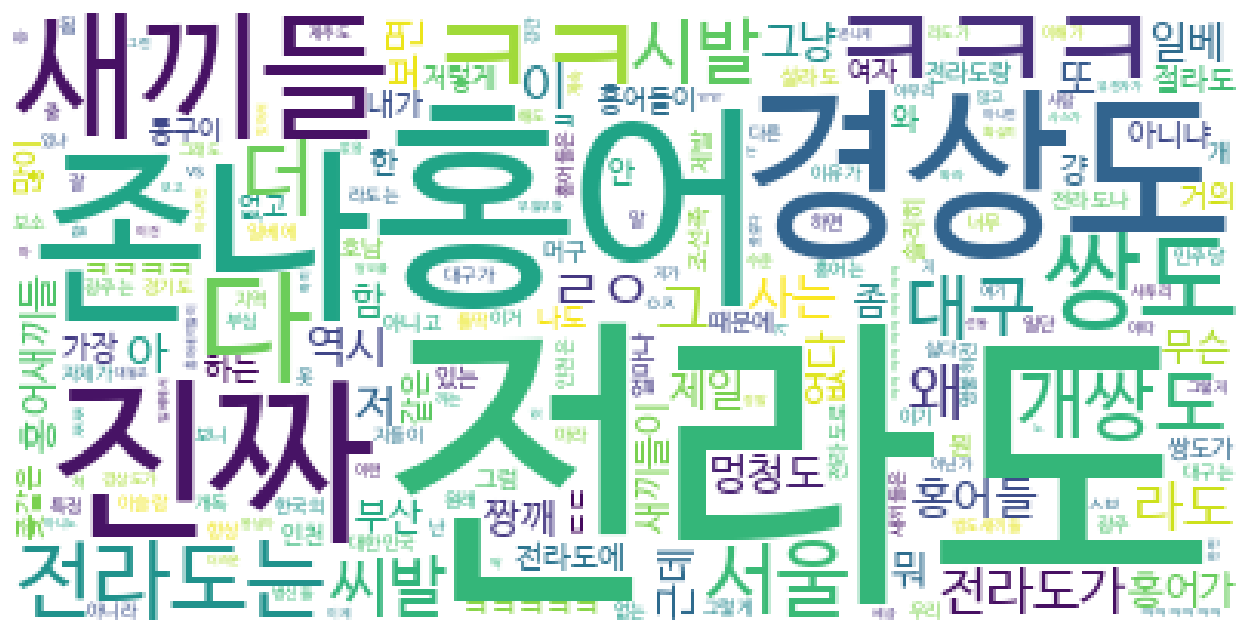

In [ ]:
# matplotlib으로 시각화
import matplotlib.pyplot as plt
plt.rc('font', family = "NamumBarunGothic")
plt.figure(figsize = (20, 8))
plt.imshow(wc_rs)
plt.axis('off')
plt.savefig("data/지역혐오.png")
plt.show()

# 1. "전라도" 뿐만 아니라 "전라도가", "전라도는", "절라도"는 같은 의미를 가지는 단어임에도 불구하고 컴퓨터는 다르게 받아들인다.
# 2. "다", "그" 등과 같이 분석에 불필요한 용어가 존재함 -> 불용어.

# 실제로 빈도분석(또는 키워드 분석) 수행 시 특정 프로세스가 필요하다.

### 2. 텍스트 분류
- 텍스트 마이닝 프로세스를 활용해보자.
### 데이터 전처리
#### 정제(Cleaning)
- 불용어 제거 : 불필요한 단어(또는 토큰)를 제거하는 작업
- 어간 추출 : 단어의 핵심 부분(어간)만 추출
- 표준어화 : 표현 방법을 표준어에 맞춰서 변경

### 정규표현식(Regular Expression)
- 특정한 패턴(규칙)을 가진 문자열의 집합을 표현하는 언어
- 핸드폰번호나 이메일처럼 패턴이 있는 문자열의 검색이나 치환을 위해서 프로그래밍 언어 대부분에서 지원하고 있다.
- https://wikidocs.net/21703

In [ ]:
import re # 정규표현식을 사용하기 위한 도구

In [ ]:
# 전화번호 검출 예시

p = re.compile("010-?[0-9]{4}-?\\d{4}")

# 010-?[0-9]{4}-?\\d{4} 패턴 설명
# 010 : 휴대폰 번호 010 고정
# -? : "-"아 둘어있을 수도 있고 없을 수도 있다(선택적)
# [0-9]{4} : 0~9 숫자가 정확히 4번 반복됨
# \\d{4} : 숫자가 4번 반복된다.

In [ ]:
p.search('전화번호 : 010-1234-5678')

<re.Match object; span=(7, 20), match='010-1234-5678'>

In [ ]:
p.search('전화번호 : 0101234-5678')

<re.Match object; span=(7, 19), match='0101234-5678'>

In [ ]:
p.search('전화번호 : 010-12345678')

<re.Match object; span=(7, 19), match='010-12345678'>

In [ ]:
p.search('전화번호 : 01012345678')

<re.Match object; span=(7, 18), match='01012345678'>

In [ ]:
p.search('전화번호 : 010-134-5678') # 가운데 번호가 하나 생략된 경우(매칭X)

In [ ]:
# 패턴생성
p = re.compile('[ㅋㅎㄷㅇ~!?.\\-ㅡ0-9a-z]+')

# 정규 표현식 패턴 설명:
# - "[...]": 대괄호 내부에 포함된 문자 중 하나와 일치하는 문자들을 의미
# - "ㅋㅎㄷㅇ": 'ㅋ', 'ㅎ', 'ㄷ', 'ㅇ' 중 하나의 문자가 들어간 부분을 매칭
#               (한국어에서 자주 쓰이는 인터넷 표현: 'ㅋㅋ', 'ㅎㅎ', 'ㄷㄷ', 'ㅇㅇ' 등)
# - "~!?.\\-": 틸드(~), 느낌표(!), 마침표(.), 물음표(?), 하이픈(-) 중 하나와 일치.
#              여기서 `\\`는 이스케이프 문자로, `\-`를 문자 그대로 인식하도록 처리
# - "ㅡ": 한글 모음 'ㅡ'를 포함
# - "0-9": 0부터 9까지의 숫자 중 하나와 일치함
# - "a-z": 소문자 알파벳(a부터 z까지) 중 하나와 일치
# - "+": 해당 문자 집합이 한 번 이상 반복될 수 있음을 의미

# 정리
# 이 정규 표현식은 인터넷에서 자주 사용되는 간단한 텍스트를 매칭할 수 있도록 하는 패턴이다
# 여러개의 한글 자모, 기호, 숫자. 소문자가 연속된 경우를 매칭한다.

In [ ]:
train_clean = [] # 전처리된 전체 텍스트를 담을 리스트

for doc in train['문장']:
  temp = [] # 전처리된 문장의 토큰이 들어갈 리스트
  for token in doc.split(" "): # 한 개의 문장을 토큰화하여 반복
    if len(token) < 2: # 1글자 제거
      continue
    if p.search(token): # 정규표현식 패턴에 매칭되는지 확인
      continue
    temp.append(token)
  train_clean.append(" ".join(temp)) # 정상적인 토큰을 전체 리스트에 추가

In [ ]:
# test set도 동일하게 적용
test_clean = []

for doc in test['문장']:
  temp = [] # 전처리된 문장의 토큰이 들어갈 리스트
  for token in doc.split(" "): # 한 개의 문장을 토큰화하여 반복
    if len(token) < 2: # 1글자 제거
      continue
    if p.search(token): # 정규표현식 패턴에 매칭되는지 확인
      continue
    temp.append(token)
  test_clean.append(" ".join(temp)) # 정상적인 토큰을 전체 리스트에 추가

In [ ]:
# 그 외 유용한 정규표현식 활용법.
# r"" : 원시(raw)문자열, \를 하나만 사용 가능하게끔 해줌
pattern = r'[^a-zA-Z0-9가-힣\s.?!]'

# sub : 치환하는 함수
re.sub(pattern, "", "안녕하세요ㅋㅋㅋㅋㅋ")
# 위 패턴이 아닌 경우(^) ""(공백)으로 반환

'안녕하세요'

### 형태소분석
- Konlpy
#### 형태소분석기
- 한국어 : konlpy(Okt, kkma, Komoran 등)
- 영어 : NLTK
| 분석기    | 속도        | 정확도        | 특징                                                         | 장단점                                                         |
|-----------|-------------|---------------|--------------------------------------------------------------|----------------------------------------------------------------|
| **Mecab** | 매우 빠름   | 높음          | - 백터 기반의 빠른 분석<br>- 대용량 데이터 처리에 적합          | + **장점:** 속도 및 효율성 우수<br>- **단점:** 설치가 다소 복잡, 사전 관리 필요 |
| **Kkma**  | 느림        | 높음          | - 문장 단위의 세밀한 분석 제공<br>- 다양한 형태소 정보 리턴       | + **장점:** 상세 분석, 문맥 파악 용이<br>- **단점:** 속도 느림, 대용량 데이터에 부적합 |
| **Hannanum** | 보통     | 중간          | - KAIST 개발 분석기로 전통적 접근법 사용<br>- 기본 문법 규칙 기반  | + **장점:** 비교적 안정적인 결과 제공<br>- **단점:** 문맥 반영 미흡, 업데이트 한계  |
| **Komoran** | 보통       | 높음          | - 최신 알고리즘 일부 적용<br>- 딥러닝 요소 도입 가능             | + **장점:** 높은 정확도, 견고한 성능<br>- **단점:** 옵션 및 커스터마이징 제한       |
| **Okt**   | 빠름        | 중간 ~ 높음   | - 소셜 미디어(예: 트위터) 문체에 최적화<br>- 감성 분석 등 특화       | + **장점:** 사용법 간편, 빠른 처리<br>- **단점:** 복잡한 문장 분석에는 한계, 단어 세분화 미흡 |

---

| 형태소 분석기                | 주요 메서드 및 인자                                            | 인자 설명                                                                                                 |
|-----------------------------|--------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| **Hannanum**                | - `pos(phrase, ntags=9, flatten=True)`                         | - **ntags**: 태그의 상세도를 지정 (일반적으로 9 또는 22 사용) <br> - **flatten**: 결과를 단일 리스트로 반환 여부  |
|                             | - `analyze(phrase)`                                             | - 후보 분석 결과(여러 형태소 분석 후보)를 반환                                                              |
| **Kkma**                    | - `pos(phrase, flatten=True)`                                  | - **flatten**: 결과를 평탄화하여 하나의 리스트로 반환                                                         |
|                             | - `sentences(phrase)`                                          | - 입력 텍스트를 문장 단위로 분리하여 리스트로 반환                                                            |
|                             | - `nouns(phrase)`, `morphs(phrase)`                              | - 각각 명사와 모든 형태소만을 추출                                                                           |
| **Komoran**                 | - `pos(phrase, flatten=True)`                                  | - **flatten**: 결과를 단일 리스트로 반환 여부                                                                 |
|                             | - `nouns(phrase)`, `morphs(phrase)`                              | - 각각 명사와 모든 형태소만을 추출                                                                           |
| **Mecab**                   | - `pos(phrase, flatten=True)`                                  | - **flatten**: 결과를 평탄화하여 하나의 리스트로 반환                                                         |
|                             | - `nouns(phrase)`, `morphs(phrase)`                              | - 각각 명사와 모든 형태소만을 추출                                                                           |
| **Okt (Open Korean Text)**  | - `pos(phrase, norm=False, stem=False)`                        | - **norm**: 정규화 여부 (예: 숫자, 영문 등의 표준 형태로 변환할지 결정) <br> - **stem**: 어간 추출 여부 (어근화)  |
|                             | - `phrases(phrase)`                                            | - 텍스트 내 구(phrase)를 추출                                                                               |
|                             | - `nouns(phrase)`, `morphs(phrase)`                              | - 각각 명사와 모든 형태소만을 추출                                                                           |

In [ ]:
# konlpy 설치
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 22.4 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt, Kkma

In [ ]:
okt = Okt() # 트위터 기반으로 시작된 형태소 분석기, 비교적 신조어에 강한편
kkma = Kkma() # 속도는 느리지만, 품사태깅이 디테일하다.

In [ ]:
# 형태소 분리
okt.morphs("아버지가 방에 들어가신다.")

['아버지', '가', '방', '에', '들어가신다', '.']

In [ ]:
# 형태소 분리 후 품사부착
okt.pos("어제는 저녁을 맛있게 먹었다.")

[('어제', 'Noun'),
 ('는', 'Josa'),
 ('저녁', 'Noun'),
 ('을', 'Josa'),
 ('맛있게', 'Adjective'),
 ('먹었다', 'Verb'),
 ('.', 'Punctuation')]

In [ ]:
# 품사 기준 확인
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [ ]:
# 품사태깅(정규화 + 원형 추출)
okt.pos(
    "어제는 저녁을 맛있게 먹었닼ㅋㅋㅋㅋㅋㅋㅋㅋ",
    norm = True, # normalize, 비표준 문어체(닼 -> 다)로 표준어 정규화
    stem = True # stemming, 활용된 단어를 원형(기본형)으로 복원 ("먹었닼 -> "먹었다" -> "먹다")
)

[('어제', 'Noun'),
 ('는', 'Josa'),
 ('저녁', 'Noun'),
 ('을', 'Josa'),
 ('맛있다', 'Adjective'),
 ('먹다', 'Verb'),
 ('ㅋㅋㅋ', 'KoreanParticle')]

In [ ]:
# kkma(꼬꼬마) - 명사 추출
kkma.nouns("아버지 가방에 들어가신다.")

['아버지', '가방']

### 이모지 제거

In [ ]:
# emoji 설치
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 6.4 MB/s eta 0:00:00


In [ ]:
train_clean[741]

'😠😠교회가면 여자는 목사에게 몸부터 치네 더럽다😓강간ㆍ성폭행ㆍ모든 종교가 인간을 종교팔이해 수백억지원 중단하고 마누라 딸을 교회에 보내지마라 먹이다'

In [ ]:
# 이모지를 빈 문자열로 대체
import emoji
emoji.replace_emoji(train_clean[741], replace = "")

'교회가면 여자는 목사에게 몸부터 치네 더럽다강간ㆍ성폭행ㆍ모든 종교가 인간을 종교팔이해 수백억지원 중단하고 마누라 딸을 교회에 보내지마라 먹이다'

In [ ]:
# 이모지를 제거하는 함수 정의
def remove_emoji(text):
  return emoji.replace_emoji(text, replace = "")

In [ ]:
# 반복 횟수를 시각화하고 예상 시간을 보여주는 도구
from tqdm.auto import tqdm

In [ ]:
# 클렌징
#konlpy_morphs_train = [] # 형태소 단위로 분리된 전체 데이터를 담아줄 리스트

#for doc in tqdm(train_clean):
#  cleaned_doc = remove_emoji(doc) # 이모지 제거
#  rs = kkma.morphs(cleaned_doc)
#  konlpy_morphs_train.append(' '.join(rs))

In [ ]:
konlpy_morphs = []

for doc in tqdm(train_clean):
  cleaned_doc = remove_emoji(doc) # 이모지 제거
  rs = okt.morphs(cleaned_doc) # 형태소 분리
  konlpy_morphs.append(' '.join(rs)) # 하나의 문자열로 만든 뒤 리스트에 담아줌

# 클렌징이나 토큰화에 있어서, 형태소 분리가 전부는 아님.
# ~~에, ~~는 같은 불용어도 있을 것

  0%|          | 0/15005 [00:00<?, ?it/s]

### Kiwi
- 지능형 한국어 형태소 분석기
- 띄어쓰기 교정도 가능!
- https://github.com/bab2min/Kiwi
- 키위 사용법 : https://bab2min.github.io/kiwipiepy/v0.19.0/kr/

In [ ]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 57.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 35.1 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.21.0-py3-none-any.whl size=35593192 sha256=6db058053bbd2292893e6ab73e021a9baef7c87b5dd18fa2567f5671100981e5
  Stored in directory: /root/.cache/pip/wheels/5f/94/81/3e8b1478625f1bdb3b72733dfe3086a8f77a8f25db2b1d746b
Successfully built kiwipiepy_model


In [ ]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
# 키위로도 품사 태깅 가능
# 형태소 단위로 나누어 각 단어에 대한 정보(형태소, 품사 태그) 반환
kiwi.tokenize('아버지다 방에 들어가신다.')
# form : 형태소
# tag : 품사
# start : 형태소의 시작 인덱스
# len : 시작부분으로부터의 길이

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='다', tag='MAG', start=3, len=1),
 Token(form='방', tag='NNG', start=5, len=1),
 Token(form='에', tag='JKB', start=6, len=1),
 Token(form='들어가', tag='VV', start=8, len=3),
 Token(form='시', tag='EP', start=11, len=1),
 Token(form='ᆫ다', tag='EF', start=11, len=2),
 Token(form='.', tag='SF', start=13, len=1)]

### 불용어 처리(stop word)
- 분석 시 필요 없는, 의미가 없는 토큰을 제거하는 행위

In [ ]:
from kiwipiepy.utils import Stopwords

# Stopwords 객체 생성 - 불용어를 관리하는 객체
stopwords = Stopwords()

# 품사 태깅 + 불용어 제거
# stopwords 매개변수를 통해서 불용어를 처리한 결과를 출력
kiwi.tokenize(
    '분석 결과에서 불용어만 제외하고 출력할 수도 있다',
    stopwords = stopwords # 불용어 필터링 적용
)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='결과', tag='NNG', start=3, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2),
 Token(form='있', tag='VA', start=25, len=1)]

In [ ]:
stopwords.add(('있', 'VA')) # 새로운 불용어 등록

In [ ]:
kiwi.tokenize(
    '분석 결과에서 불용어만 제외하고 출력할 수도 있다',
    stopwords = stopwords # 불용어 필터링 적용
)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='결과', tag='NNG', start=3, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2)]

### 띄어쓰기 교정

In [ ]:
kiwi.space("띄어쓰기없이작성된텍스트네이걸교정해")
# 띄어쓰기 메뉴얼
# https://bab2min.github.io/kiwipiepy/v0.15.0/kr/#kiwipiepy.Kiwi.space

'띄어쓰기 없이 작성된 텍스트네 이걸 교정해'

In [ ]:
# Kiwi의 문맥적 처리 능력과 okt의 형태소 분석 효율성을 결합

# 텍스트 클리닝 및 형태소 분석 함수 정의
def clean_and_tokenize(text, tokenizer):
  # 1. 이모지 제거 - 먼저 불필요한 이모지를 제거해 처리할 텍스트 축소
  text = remove_emoji(text)

  # 2. 띄어쓰기 교정 - 이모지 제거 후 올바른 띄어쓰기 적용
  corrected_text = kiwi.space(text)

  # 2-1. 맞춤법 교정 -> 네이버 맞춤법 교정 API(시간이 굉장히 오래걸림)
  # 3. 불용어 제거 - 불용어 제거를 통해 분석 대상의 의미있는 단어만 남김
  tokens = kiwi.tokenize(corrected_text, stopwords = stopwords)
  clean_text = ' '.join([token.form for token in tokens])
  # 각 토큰의 form 추출 후 이어붙이기

  # 형태소 분석 정확도 보완(okt) : Kiwi는 문맥 처리에 강하지만, 명확한 형태소 단위 분석에서는 okt가 더 정확할 수 있다.
  # Kiwi만으로도 형태소 분석이 충분한 경우 okt를 사용하지 않아도 된다.
  # 4. 형태소 단위 분리 - okt 사용(속도와 정확도 최적화)
  morphs = tokenizer.morphs(clean_text)

  # 5. 하나의 문자열로 결합하여 반환
  return " ".join(morphs)

In [ ]:
from tqdm.auto import tqdm
# train data (클렌징한 데이터를 형태소 단위로 분리)
konlpy_morphs_train = [] # 형태소로 분리된 전체 데이터가 들어갈 리스트

for doc in tqdm(train_clean):
  cleaned_doc = clean_and_tokenize(doc, okt) # 이모지 제거, 띄어쓰기 교정, 불용어 제거, 형태소 분리 가능.
  konlpy_morphs_train.append(cleaned_doc)

  0%|          | 0/15005 [00:00<?, ?it/s]

In [ ]:
konlpy_morphs_test = [] # 형태소로 분리된 전체 데이터가 들어갈 리스트

for doc in tqdm(test_clean):
  cleaned_doc = clean_and_tokenize(doc, okt) # 이모지 제거, 띄어쓰기 교정, 불용어 제거, 형태소 분리 가능.
  konlpy_morphs_test.append(cleaned_doc)

  0%|          | 0/15005 [00:00<?, ?it/s]

### 토큰화
- 일정 단위로 쪼개는 행위
> 단어(띄어쓰기), 글자, 형태소 단위, n-gram(문맥 반영)

### 수치화
- 토큰을 컴퓨터가 이해할 수 있는 숫자 형태로 변환하는 방법
> 인코딩(원핫, 라벨, 빈도 등), 빈도 기반 수치화(BOW, TFIDF 등), 임베딩(단어, 문서 등)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# 원본 데이터 적용 전 샘플 데이터 확인
sample_text = ["나는 오늘 저녁에 치킨을 먹을꺼야",
               "너는 오늘 저녁에 무엇을 먹을꺼니?",
               "나는 오늘 아침에 운동을 하고 왔어",
               "어제 저녁에 운동을 했더니 배가 많이 고프다"]

In [ ]:
# step 1 : 단어사전 구축
sample_cv = CountVectorizer()
sample_cv.fit(sample_text)

CountVectorizer()

In [ ]:
# 단어사전 확인
sample_cv.vocabulary_

{'나는': 1,
 '오늘': 10,
 '저녁에': 13,
 '치킨을': 14,
 '먹을꺼야': 5,
 '너는': 2,
 '무엇을': 6,
 '먹을꺼니': 4,
 '아침에': 8,
 '운동을': 12,
 '하고': 15,
 '왔어': 11,
 '어제': 9,
 '했더니': 16,
 '배가': 7,
 '많이': 3,
 '고프다': 0}

In [ ]:
# step 2 : 단어사전을 기반으로 각 문장에서 단어의 빈도를 세어 표현
result = sample_cv.transform(sample_text)

In [ ]:
result.toarray() # numpy 배열로 형변환

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]])

In [ ]:
# 벡터화 결과 DataFrame으로 변환하기
pd.DataFrame(
    result.toarray(), # 벡터화된 배열
    columns = sample_cv.get_feature_names_out() # 단어사전의 단어
)

,고프다,나는,너는,많이,먹을꺼니,먹을꺼야,무엇을,배가,아침에,어제,오늘,왔어,운동을,저녁에,치킨을,하고,했더니
0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0
1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0
3,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1


### TF-IDF
- 전체 문서에서 모두 증장하는 단어보다는 특정 문서에서 자주 나오는 단어일수록 중요도를 높게 보는 방식
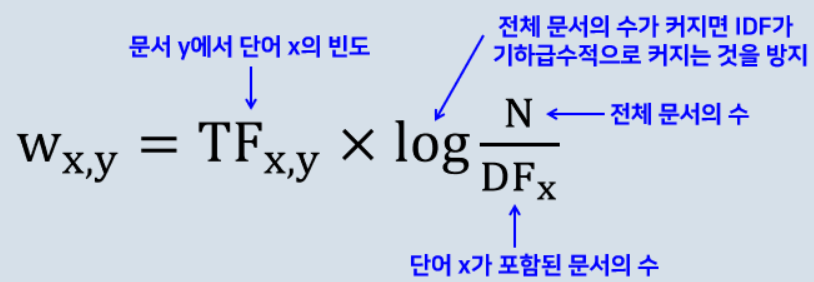

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

### 혐오표현데이터 수치화

In [ ]:
# kiwi에서 Stopwords 객체에 들어있던 불용어 사전 확인
stopwords_set = stopwords.stopwords

type(stopwords)
# set : 집합형(중복X)

kiwipiepy.utils.Stopwords

In [ ]:
# set에서 단어만 추출
stopwords_list = [word for word, tag in  stopwords_set]

In [ ]:
# 추후에 성능 비교를 위해 2가지 종류로 진행해보자.

unsmile_cv = CountVectorizer(
    stop_words = stopwords_list, # 불용어등록
    ngram_range = (1, 2),
    # n-gram 설정 (유니, 바이, 트라이) -> 단어간의 문맥, 관계를 더 잘 반영
    max_df = 0.7,
    # 최대 등장 비율 -> 전체 문서 중 70% 이상에서 등장하는 단어는 무시하겠다.
    min_df = 10
    # 최소 등장 빈도 -> 특정 단어가 적어도 10개 이상의 문서에서 등장해야 고려하겠다.
)

unsmile_tf_idf = TfidfVectorizer(
    stop_words = stopwords_list,
    ngram_range = (1, 2),
    max_df = 0.7,
    min_df = 10
)

In [ ]:
# 2. 단어 사전 구축
unsmile_cv.fit(konlpy_morphs_train)
unsmile_tf_idf.fit(konlpy_morphs_train)
# test set은 모델의 성능을 평가하는데 사용하기 때문에 모델이 사전에 test set의 정보를 모르게 해야한다.

TfidfVectorizer(max_df=0.7, min_df=10, ngram_range=(1, 2),
                stop_words=['더', '위하', '만', 'ᆫ', '중', '과', '었', '을', '은', '어서',
                            '도', '지만', '때', '와', '면서', '일', '고', '겠', '들', '하',
                            '다는', '있', '는', '하', '에서', '다고', '아니', '사람', '통하',
                            '우리', ...])

In [ ]:
# BOW 단어사전기반으로 벡터 변환
X_train_cv = unsmile_cv.transform(konlpy_morphs_train)
X_test_cv = unsmile_cv.transform(konlpy_morphs_train)

# tf_idf 단어사전기반으로 벡터 변환
X_train_tf_idf = unsmile_tf_idf.transform(konlpy_morphs_train)
X_test_tf_idf = unsmile_tf_idf.transform(konlpy_morphs_test)

### 정답데이터 추출
- 혐오표현 : 0
- 악플&욕설 : 1
- clean : 2

In [ ]:
# 혐오표현에 대한 라벨 병합
train['혐오표현'] = train.loc[:, '여성/가족':'기타 혐오'].sum(axis = 1)
test['혐오표현'] = test.loc[:, '여성/가족':'기타 혐오'].sum(axis = 1)

In [ ]:
# 새로운 데이터셋 초기화
new_train = train[['문장', '혐오표현', '악플/욕설', 'clean']]
new_test = test[['문장', '혐오표현', '악플/욕설', 'clean']]

In [ ]:
# 정답 라벨링을 위한 사용자 지정함수
# 혐오표현 : 0
# 악플/욕설 : 1
# clean : 2

def label(row):
  if row['혐오표현'] > 0:
    return 0
  elif row['악플/욕설'] > 0:
    return 1
  else:
    return 2

In [ ]:
y_train = new_train.apply(label, axis = 1)
y_test = new_test.apply(label, axis = 1)

In [ ]:
print(y_train.value_counts().sort_index())
print(y_test.value_counts().sort_index())

0    8121
1    3143
2    3741
Name: count, dtype: int64
0    8121
1    3143
2    3741
Name: count, dtype: int64


### 모델 학습 및 평가(교차검증)

In [ ]:
from sklearn.linear_model import LogisticRegression # 선형분류모델
from sklearn.model_selection import cross_val_score # 교차검증함수

In [ ]:
logi = LogisticRegression(max_iter = 10000)

In [ ]:
# CountVectorizer(cv) 교차검증
score_cv = cross_val_score(logi, X_train_cv, y_train, cv = 5).mean()
score_cv

np.float64(0.6423192269243586)

In [ ]:
# Tf-idf 교차검증
score_tf_idf = cross_val_score(logi, X_train_cv, y_train, cv = 5).mean()
score_tf_idf

# CountVectorizer, TF-IDF 둘 모두 성능이 비슷하다
# 이유는 빈도 기반 수치화의 단점.

np.float64(0.6423192269243586)

# 빈도 기반 수치화의 한계와 희소표현(Sparse Representation)

자연어 처리(NLP)에서 단어를 수치로 표현하는 가장 기본적인 방법은 TF, TF-IDF와 같은 **빈도 기반 수치화*. 하지만 이 방식에는 여러 한계가 존재하며, 특히 희소 표현 문제와 밀접한 관련이 있음

---

## 1. 희소 행렬(Sparse Matrix) 문제

- 문장을 고차원 벡터(단어 수만큼의 차원)로 표현하지만 대부분 0으로 채워짐
- 예: "나는 밥을 먹었다" → 전체 단어 집합 수천 개 중 3~4개만 사용됨

### 단점
- **메모리 비효율**: 대부분의 값이 0이라도 저장 공간은 필요
- **계산 비효율**: 거리 계산, 유사도 측정 등에서 연산량 증가

---

## 2. 단어 간 의미(의미론) 미반영

- "배고프다"와 "허기지다"는 뜻은 유사하지만 완전히 다른 벡터로 표현됨
- 단어의 **의미적 유사성, 동의어/반의어 관계**를 반영하지 못함

---

## 3. 어순과 문법 정보 손실

- Bag-of-Words(BOW) 구조이기 때문에 **단어의 순서가 사라짐**
- "나는 너를 좋아해" ≈ "너는 나를 좋아해" → 뜻은 다르지만 유사한 벡터

---

## 4. OOV(Out-of-Vocabulary) 문제

- 단어 사전에 없는 단어는 무시됨
- 신조어, 오타, 희귀어에 취약
- 특히 한국어는 형태소가 다양하여 더 큰 문제 발생

---

## 대안: 의미와 문맥을 반영하는 임베딩

| 대안 | 설명 |
|------|------|
| **Word2Vec / GloVe** | 의미 기반 밀집 벡터 표현. 유사한 단어는 유사한 벡터 |
| **FastText** | 부분 단어(subword)까지 학습하여 OOV 문제 완화 |
| **BERT / GPT 등** | 문맥 기반 사전학습 언어 모델. 의미, 어순, 관계 반영 가능 |

---

> 빈도 기반 수치화는 단순하고 빠르지만, **의미와 문맥을 반영하지 못하고 희소성이 높다**는 한계가 있음.  
> → 현대 NLP에서는 밀집 벡터(dense vector) 기반 임베딩이 주류.

### 하이퍼파라미터 튜닝
- PipeLine + GridSearchCV
- TF-IDF + Logistic Regression 기능 묶음과 함께 최적의 파라미터 찾기

In [ ]:
from sklearn.pipeline import Pipeline # 기능 연결
from sklearn.model_selection import GridSearchCV
# 그리드 서치 : 여러 하이퍼파라미터 조합을 한꺼번에 테스트해서, 가장 좋은 성능을 내는 조합을 자동으로 찾아주는 도구

In [ ]:
# 하나의 파이프라인으로 묶기
unsmile_pipeline = Pipeline(
    [
        ('unsmile_tf_idf', TfidfVectorizer(stop_words = stopwords_list)), # 객체명, 객체 초기화
        ('unsmile_logi', LogisticRegression(max_iter = 10000))
    ]
)

In [ ]:
# GridSearch 하이퍼파라미터 정의
grid_params = {
    "unsmile_tf_idf__max_df": [0.5, 0.7, 0.8], # 단어가 전체 문서 중 최대 몇 % 이상의 문서에 등장하면 무시
    # 값이 작을수록 자주 등장하는 단어를 제외 (불필요한 단어 필터링)
    # 예: 0.7이면 전체 문서의 70% 이상에서 등장하는 단어는 무시

    "unsmile_tf_idf__min_df": [3, 5, 7, 10],  # 단어가 최소 몇 개의 문서에 등장해야 포함되는지 설정
    # 값이 작을수록 드물게 등장하는 단어도 포함됨
    # 예: 5라면 최소 5개 이상의 문서에서 등장해야 해당 단어가 포함됨

    "unsmile_tf_idf__ngram_range": [(1, 1), (1, 2), (1, 3)],  # n-gram을 적용할 범위 지정
    # (1,1): unigram(단어 단위)만 사용
    # (1,2): unigram과 bigram(2단어 조합) 사용
    # (1,3): unigram, bigram, trigram(3단어 조합) 모두 사용

    "unsmile_logi__C": [0.01, 0.1, 1, 10],  # 정규화 강도 (정규화의 역수, 작은 값일수록 강한 정규화)
    # 작은 값: 더 강한 제약을 가해 과적합 방지
    # 큰 값: 모델이 데이터에 더 잘 맞도록 유연성 증가
}

In [ ]:
grid = GridSearchCV(
    unsmile_pipeline, # 테스트할 모델(Pipeline 객체)
    grid_params, # 테스트할 파라미터 조합 (grid_params 딕셔너리)
    cv = 3, # 교차 검증 회수
    n_jobs = -1 # 모든 CPU코어를 사용해서 병렬 처리(성능 최적화)
)

In [ ]:
grid.fit(konlpy_morphs_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('unsmile_tf_idf',
                                        TfidfVectorizer(stop_words=['더', '위하',
                                                                    '만', 'ᆫ',
                                                                    '중', '과',
                                                                    '었', '을',
                                                                    '은', '어서',
                                                                    '도', '지만',
                                                                    '때', '와',
                                                                    '면서', '일',
                                                                    '고', '겠',
                                                                    '들', '하',
                                                                    '다는', '있',
                                                                    '는', '하',
                                                                    '에서', '다고',
                                                                    '아니', '사람',
                                                                    '통하', '우리', ...])),
                                       ('unsmile_logi',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'unsmile_logi__C': [0.01, 0.1, 1, 10],
                         'unsmile_tf_idf__max_df': [0.5, 0.7, 0.8],
                         'unsmile_tf_idf__min_df': [3, 5, 7, 10],
                         'unsmile_tf_idf__ngram_range': [(1, 1), (1, 2),
                                                         (1, 3)]})